In [12]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import seaborn as sns
import matplotlib.pyplot as plt



In [13]:
# Ruta del archivo CSV
data_path = r"D:\CONTRATOS 2024\LEANDRO DOCUMENTOS\LEANDRO DOCUMENTOS\UNIVERSIDAD\SEXTO SEMESTRE\ANALISIS DE DATOS\TAREA 4\Mall_Customers.csv"

# Cargar los datos en un DataFrame
df = pd.read_csv(data_path)

# Ver las primeras filas del DataFrame para confirmar la carga
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [14]:
from sklearn.preprocessing import StandardScaler

# excluimos 'CustomerID' y cualquier columna no numérica
# se ajsuta estos nombres de columnas según el dataset
columns_to_scale = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[columns_to_scale])

# Convertir de nuevo a DataFrame para facilitar operaciones posteriores
df_scaled = pd.DataFrame(df_scaled, columns=columns_to_scale)

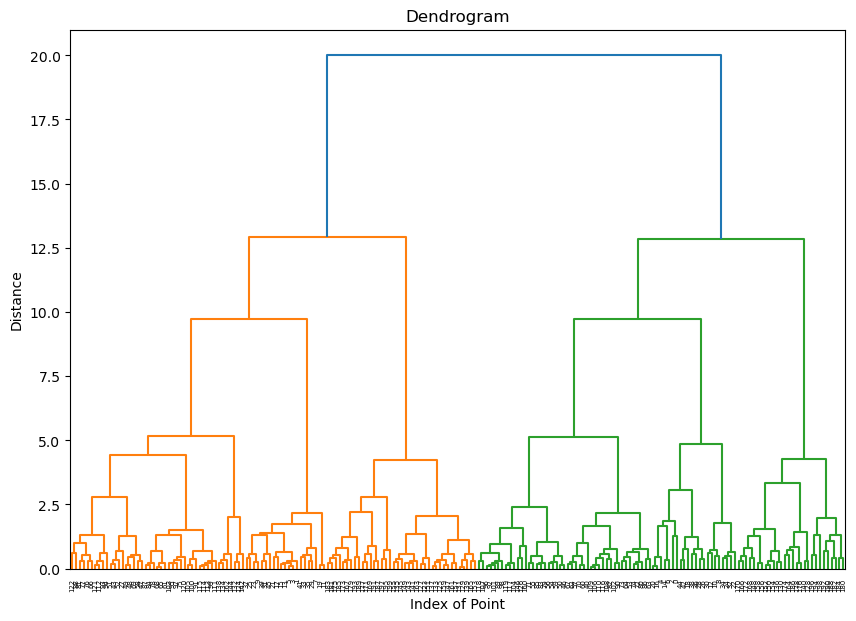

In [17]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Generar la matriz de enlaces
linked = linkage(df_scaled, method='ward')

# Dibujar el dendrograma
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           labels=df.index.to_list(),
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Index of Point')
plt.ylabel('Distance')
plt.show()

In [19]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# cortamos el dendrograma para formar 5 clusters
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(linked, 5, criterion='maxclust')
df['Cluster'] = clusters

# Calcula las métricas de rendimiento
silhouette_avg = silhouette_score(df_scaled, df['Cluster'])
calinski_harabasz = calinski_harabasz_score(df_scaled, df['Cluster'])

print("Silhouette Score: ", silhouette_avg)
print("Calinski-Harabasz Score: ", calinski_harabasz)

Silhouette Score:  0.39002826186267214
Calinski-Harabasz Score:  107.82656032570377


In [21]:
df['Cluster'] = df['Cluster'].astype('category')
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100) Cluster
0           1    Male   19                  15                      39       2
1           2    Male   21                  15                      81       5
2           3  Female   20                  16                       6       2
3           4  Female   23                  16                      77       5
4           5  Female   31                  17                      40       2


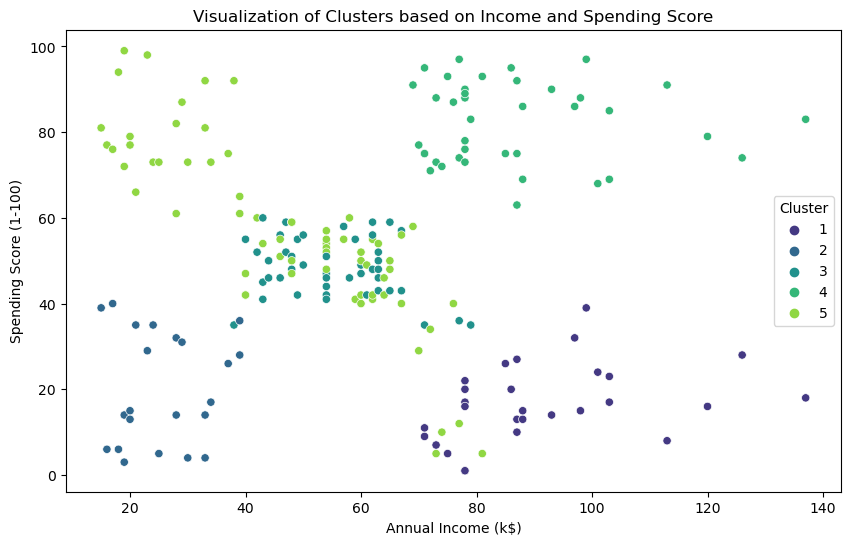

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='viridis', legend='full')
plt.title('Visualization of Clusters based on Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [ ]:
#Cluster 1 (verde claro): Representa clientes con ingresos relativamente altos y puntuaciones altas de gasto. Este grupo puede ser visto como "gastadores premium", quienes son menos sensibles al precio y podrían ser el foco para productos y servicios de alto valor.
#Cluster 2 (verde oscuro): Consiste en clientes con ingresos medios a altos pero con puntuaciones de gasto moderadas. Este grupo puede ser más consciente del precio o más selectivo en sus compras.
#Cluster 3 (azul): Incluye a clientes con ingresos bajos y puntuaciones bajas de gasto, representando a consumidores más conservadores que podrían estar limitados por su capacidad de gasto.
#Cluster 4 (morado): Este grupo muestra ingresos y gastos moderados, indicando una tendencia hacia un comportamiento de compra equilibrado.
#Cluster 5 (amarillo): Destacado por ingresos bajos pero puntuaciones relativamente altas de gasto, sugiriendo que este segmento, a pesar de tener ingresos limitados, prioriza el gasto en ciertas categorías.

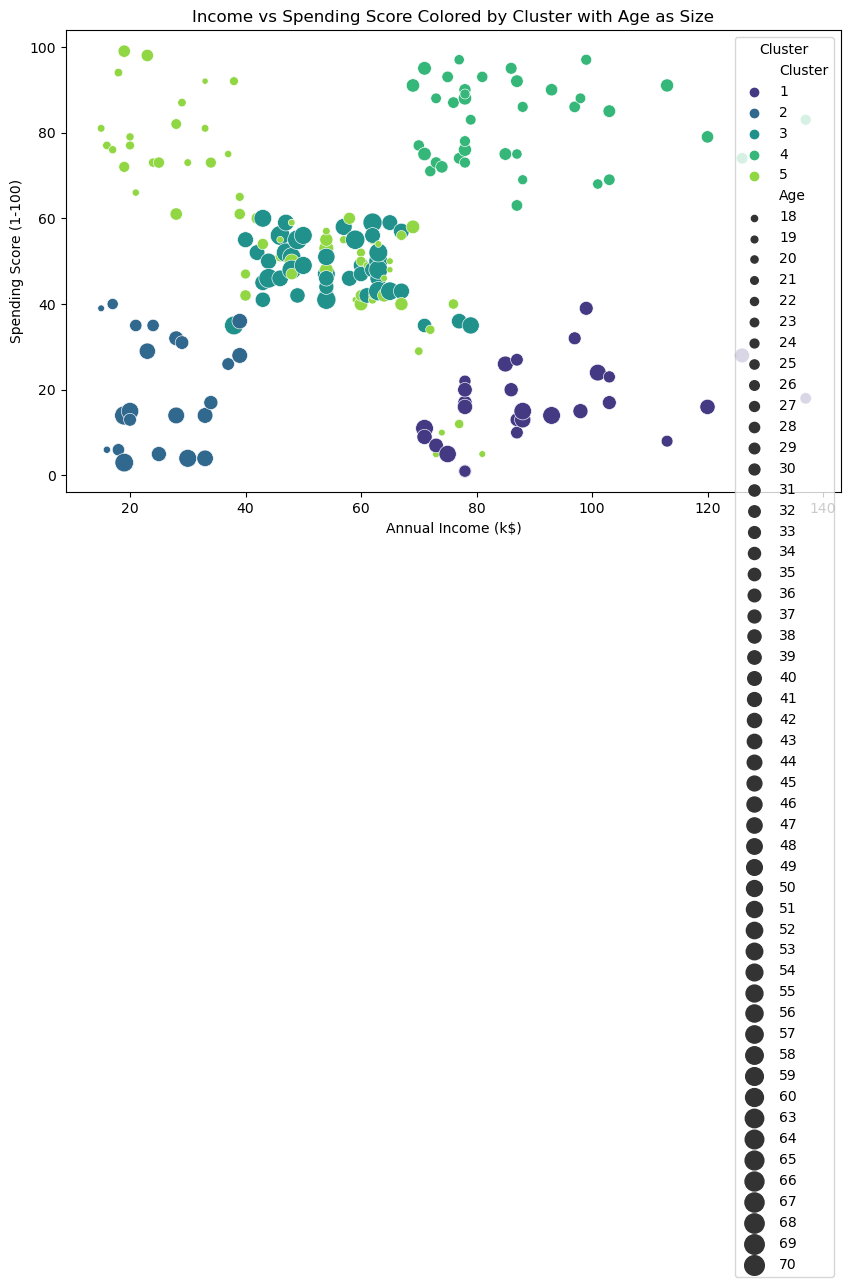

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Asumiendo que 'df' tiene columnas para 'Age' además de las ya utilizadas
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', size='Age', hue='Cluster', data=df, palette='viridis', legend='full', sizes=(20, 200))
plt.title('Income vs Spending Score Colored by Cluster with Age as Size')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

In [ ]:
#Distribución de Ingresos y Gastos:
#Se observa una división clara entre los clusters según el ingreso anual y la puntuación de gastos. Los puntos agrupados en la parte inferior derecha (púrpura) corresponden a ingresos bajos con gastos moderados a bajos, mientras que los puntos en la parte superior izquierda (verde claro) indican ingresos más altos con gastos también altos.
#Impacto de la Edad:
#El tamaño de los puntos indica la edad del cliente, lo que añade una capa adicional de interpretación. Los puntos más grandes en algunos clusters sugieren una presencia más significativa de clientes mayores, particularmente en los clusters con ingresos y gastos más bajos, mientras que los puntos más pequeños en clusters de altos ingresos y gastos podrían indicar una población más joven.
#Esta visualización nos permite no solo segmentar a los clientes por ingresos y comportamientos de gasto, sino también considerar cómo la edad influye en estos patrones.

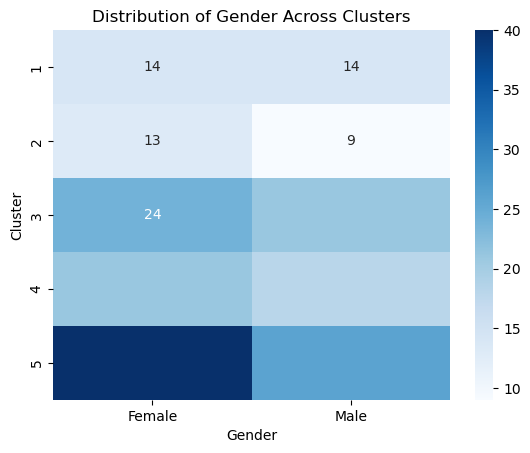

In [26]:
# distribucion de'Gender' y cómo se distribuye por cluster
cluster_gender = pd.crosstab(df['Cluster'], df['Gender'])
sns.heatmap(cluster_gender, annot=True, cmap='Blues', fmt='d')
plt.title('Distribution of Gender Across Clusters')
plt.xlabel('Gender')
plt.ylabel('Cluster')
plt.show()

In [ ]:
#La gráfica "Distribution of Gender Across Clusters"
#Cluster 1: Tiene una distribución equitativa de géneros, con 14 hombres y 14 mujeres. Esto sugiere que las características que definen este cluster no están particularmente inclinadas hacia un género específico.
#Cluster 2: Predominantemente femenino con 13 mujeres comparado con 9 hombres. Esto puede indicar que las mujeres son más propensas a las características o comportamientos que define este grupo.
#Cluster 3: Este cluster muestra una notable mayoría femenina con 21 mujeres frente a 6 hombres. Este es un desbalance significativo que podría ser explorado para entender mejor las preferencias o necesidades específicas que son más comunes entre las mujeres en este segmento.

C:\Users\fabia\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


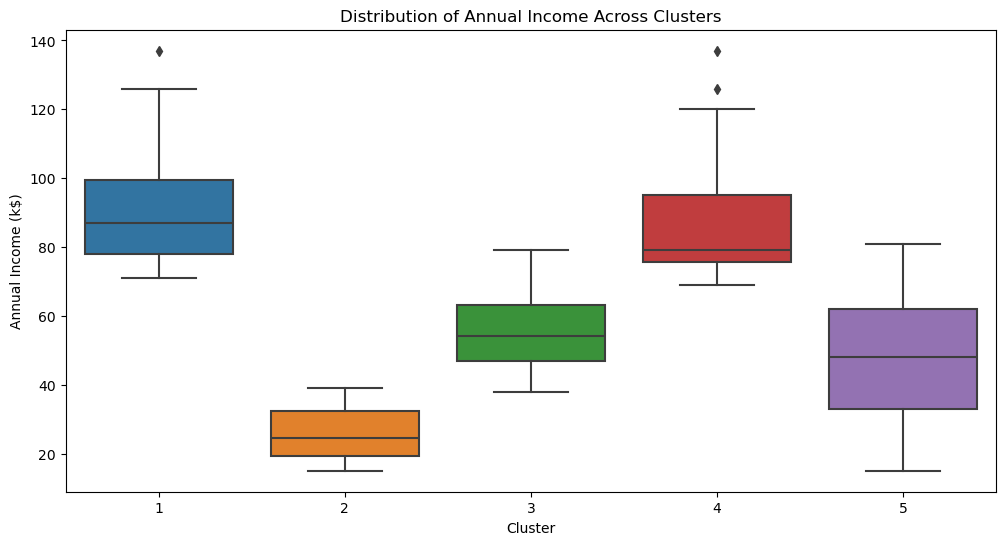

In [27]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='Annual Income (k$)', data=df)
plt.title('Distribution of Annual Income Across Clusters')
plt.show()

C:\Users\fabia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\fabia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
C:\Users\fabia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\fabia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and 

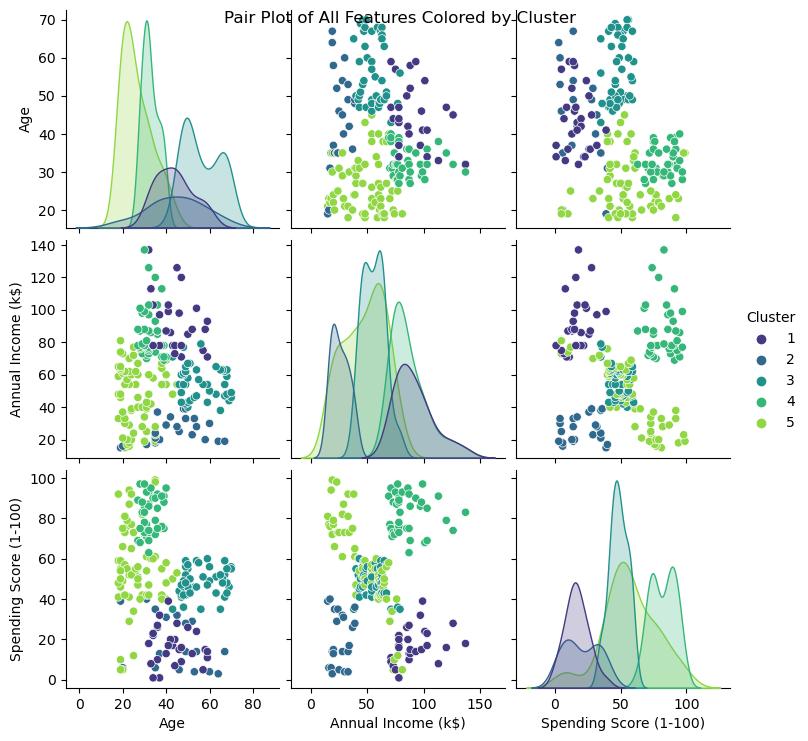

In [29]:
sns.pairplot(df.drop(['CustomerID'], axis=1), hue='Cluster', palette='viridis')
plt.suptitle('Pair Plot of All Features Colored by Cluster')
plt.show()

In [ ]:
#La gráfica "Pair Plot of All Features Colored by Cluster" ofrece una representación visual detallada de cómo se relacionan diversas características (edad, ingresos anuales y puntuación de gastos) entre sí dentro de diferentes clusters. Este tipo de visualización es extremadamente útil para identificar patrones y correlaciones entre las variables. 
#Distribuciones Unidimensionales (Histogramas):Edad: Los histogramas de la edad para cada cluster muestran variaciones en la distribución de edad. Algunos clusters, como el 3, parecen tener una concentración más alta de individuos más jóvenes, mientras que otros, como el 2, muestran una mayor dispersión de edades.
#Ingresos Anuales (k$): Se observa que algunos clusters tienen rangos más amplios de ingresos, como el cluster 1, que incluye individuos con altos ingresos, y otros más concentrados, como el cluster 4, con ingresos moderados.
#Puntuación de Gasto: Similar a los ingresos, hay una variabilidad considerable en la puntuación de gasto entre los clusters, indicando diferencias en comportamientos de consumo.
#Conclusiones
#Segmentación Efectiva: El análisis subraya la efectividad de la segmentación del cliente, mostrando cómo diferentes grupos tienen características distintivas en términos de demografía y comportamiento de consumo.
#Implicaciones para Estrategias de Negocio: Comprender estas relaciones ayuda a afinar las estrategias de marketing y ventas, permitiendo a la empresa dirigir esfuerzos de manera más precisa hacia segmentos específicos basados en sus características y hábitos de consumo.
#Identificación de Oportunidades de Mercado: Los insights generados pueden ayudar a identificar oportunidades para nuevos productos o adaptaciones de los existentes, dirigidos a satisfacer las necesidades y preferencias de cada segmento de manera más efectiva.